In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HW2_heart_2020_cleaned.csv')

In [3]:
#檢查是否有遺漏值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

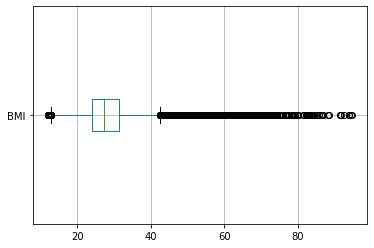

In [4]:
df.loc[:, 'BMI':'BMI'].boxplot(vert=False);

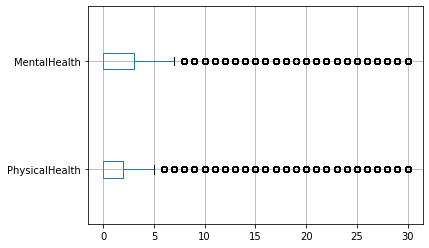

In [5]:
df.loc[:, 'PhysicalHealth':'MentalHealth'].boxplot(vert=False);

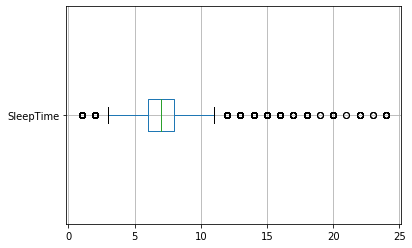

In [6]:
df.loc[:, 'SleepTime':'SleepTime'].boxplot(vert=False);

In [4]:
# 找出BMI離群值並刪除
def outlier_idx(x):
    q1, q3 = np.percentile(x, [25, 75])
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    return np.where((x < lower_bound) | (x > upper_bound))

idx = outlier_idx(df['BMI'])[0]
df['Outlier'] = [1 if i in idx else 0 for i in df.index]
df = df[~df['Outlier'].isin([1])]
del df['Outlier']

In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,309399.000000,309399.000000,309399.000000,309399.000000
mean,27.671533,3.239319,3.800242,7.105275
std,5.217810,7.794130,7.853310,1.422866
min,12.970000,0.000000,0.000000,1.000000
25%,23.810000,0.000000,0.000000,6.000000
50%,27.120000,0.000000,0.000000,7.000000
75%,30.900000,2.000000,3.000000,8.000000
max,42.500000,30.000000,30.000000,24.000000


In [8]:
#標籤化數據

df['HeartDisease'] = df['HeartDisease'].replace(['No','Yes'],[0,1])

df['Smoking'] = df['Smoking'].replace(['No','Yes'],[0,1])

df['AlcoholDrinking'] = df['AlcoholDrinking'].replace(['No','Yes'],[0,1])

df['Stroke'] = df['Stroke'].replace(['No','Yes'],[0,1])

df['DiffWalking'] = df['DiffWalking'].replace(['No','Yes'],[0,1])

df['Sex'] = df['Sex'].replace(['Male','Female'],[0,1])

df['AgeCategory'] = df['AgeCategory'].replace(
    ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'],
    [0,1,2,3,4,5,6,7,8,9,10,11,12])

df['Race'] = df['Race'].replace(
    ['White','Black','Asian','Hispanic','American Indian/Alaskan Native','Other'],
    [0,1,2,3,4,5])

df['Diabetic'] = df['Diabetic'].replace(
    ['No','No, borderline diabetes','Yes','Yes (during pregnancy)'],
    [0,1,2,3])

df['PhysicalActivity'] = df['PhysicalActivity'].replace(['No','Yes'],[0,1])

df['GenHealth'] = df['GenHealth'].replace(
    ['Poor','Fair','Good','Very good','Excellent'],
    [0,1,2,3,4])

df['Asthma'] = df['Asthma'].replace(['No','Yes'],[0,1])

df['KidneyDisease'] = df['KidneyDisease'].replace(['No','Yes'],[0,1])

df['SkinCancer'] = df['SkinCancer'].replace(['No','Yes'],[0,1])

In [10]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,6.514536,0.615585,0.300386,0.775362,2.595028,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.296412,0.716480,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000
